In [ ]:
import numpy as np
import pandas as pd
import os

Mounting google drive to access dataset

In [ ]:
# Mounting google drive to access dataset
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Reading CSV file and display some of its instances

In [ ]:
# Reading CSV file and display some of its instances
df = pd.read_csv('/content/gdrive/MyDrive/PL_Project/depression_dataset.csv', encoding='latin-1')
cols = ["target", "ids", "date", "flag", "user", "TweetText"]
df.columns = cols
df.head()

,target,ids,date,flag,user,TweetText
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


# Dataset

describing data

In [ ]:
df.describe()

,target,ids
count,1.599999e+06,1.599999e+06
mean,2.000001e+00,1.998818e+09
std,2.000001e+00,1.935757e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.956916e+09
50%,4.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


Information of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   target     1599999 non-null  int64 
 1   ids        1599999 non-null  int64 
 2   date       1599999 non-null  object
 3   flag       1599999 non-null  object
 4   user       1599999 non-null  object
 5   TweetText  1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


Counting total no. of null values present in the dataset

In [ ]:
print("Total no. of null values available in the dataset in each column")
df.isnull().sum()

Total no. of null values available in the dataset in each column


target       0
ids          0
date         0
flag         0
user         0
TweetText    0
dtype: int64

to check is their any instances are there which is repeated

In [ ]:
df.duplicated().sum()

0

box-plot or values of target

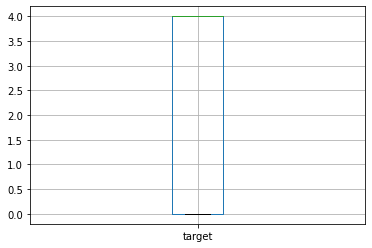

In [ ]:
df.boxplot(column='target')

converting label 4 to label 1

In [ ]:
df['target'] = df['target'].replace(4,1,regex=True)

box-plot or values of target

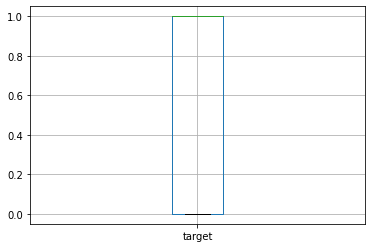

In [ ]:
df.boxplot(column='target')

unique values present in the dataset for target column

In [ ]:
df.target.unique()

array([0, 1])

counting of each unique value

In [ ]:
df.target.value_counts()

1    800000
0    799999
Name: target, dtype: int64

###Types of words present in the dataset

taking data of target and tweettext column because we will train our model on these two columns

In [ ]:
cols = ['target','TweetText']
df1 = df[cols]

importing necessary libraries

In [ ]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import nltk
import string
import warnings

making and priting wordcloud by words present in the dataset

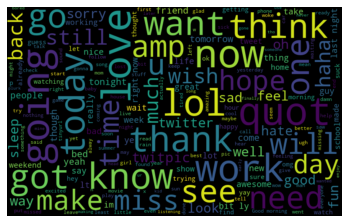

In [ ]:
all_type_words = ' '.join([text for text in df1['TweetText']])
all_words = WordCloud(width=800,height=500,random_state=15,max_font_size=95).generate(all_type_words)
plt.figure(figsize=(6,4))
plt.imshow(all_words, interpolation="bilinear")
plt.axis('off')
plt.show()

printing word clouds of positive words

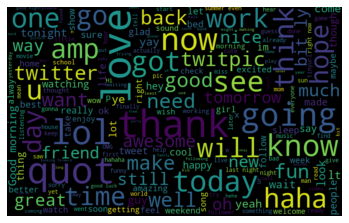

In [ ]:
positive_type_words = ' '.join([text for text in df1['TweetText'][df1['target']==1]])
positive_words = WordCloud(width=800,height=500,random_state=15,max_font_size=95).generate(positive_type_words)
plt.figure(figsize=(6,4))
plt.imshow(positive_words, interpolation="bilinear")
plt.axis('off')
plt.show()

printing word clouds of negative words

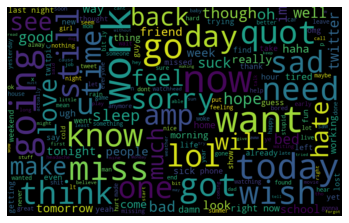

In [ ]:
negative_type_words = ' '.join([text for text in df1['TweetText'][df1['target']==0]])
negative_words = WordCloud(width=800,height=500,random_state=15,max_font_size=95).generate(negative_type_words)
plt.figure(figsize=(6,4))
plt.imshow(negative_words, interpolation="bilinear")
plt.axis('off')
plt.show()

# Data Preprocessing

finding positive words and negative words from dataset

In [ ]:
non_depressive_words1 = df[df.target==1].iloc[:1599999,:]
print(non_depressive_words1.shape)
depressive_words1 = df[df.target==0].iloc[:1599999,:]
print(depressive_words1.shape)
df2 = pd.concat([non_depressive_words1,depressive_words1],axis = 0)
print(df2.shape)
df2.head()

(200000, 6)
(200000, 6)
(400000, 6)


,target,ids,date,flag,user,TweetText
799999,1,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800000,1,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800001,1,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800002,1,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800003,1,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


Importing nltk and downloding stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Removing Twitter Handles (@user) , Punctuations, Numbers,Special Characters links and stopwords form tweettext

In [ ]:
# Removing Twitter Handles (@user)
df1['Clean_TweetText'] = df1['TweetText'].str.replace("@", "")
# Removing links
df1['Clean_TweetText'] = df1['Clean_TweetText'].str.replace(r"http\S+", "")
# Removing Punctuations, Numbers, and Special Characters
df1['Clean_TweetText'] = df1['Clean_TweetText'].str.replace("[^a-zA-Z]", " ")
# Removing the stop words
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text
df1['Clean_TweetText'] = df1['Clean_TweetText'].apply(lambda text : remove_stopwords(text.lower()))
df1.shape

<ipython-input-23-e304ed177781>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Clean_TweetText'] = df1['Clean_TweetText'].str.replace(r"http\S+", "")
<ipython-input-23-e304ed177781>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Clean_TweetText'] = df1['Clean_TweetText'].str.replace("[^a-zA-Z]", " ")


(1599999, 3)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

tokeniazing and normalizing the tweettext

In [ ]:
# Text Tokenization and Normalization
df1['Clean_TweetText'] = df1['Clean_TweetText'].apply(lambda x: nltk.word_tokenize(x))
df1.head()

,target,TweetText,Clean_TweetText
0,0,is upset that he can't update his Facebook by ...,"[upset, update, facebook, texting, might, cry,..."
1,0,@Kenichan I dived many times for the ball. Man...,"[kenichan, dived, many, times, ball, managed, ..."
2,0,my whole body feels itchy and like its on fire,"[whole, body, feels, itchy, like, fire]"
3,0,"@nationwideclass no, it's not behaving at all....","[nationwideclass, behaving, mad, see]"
4,0,@Kwesidei not the whole crew,"[kwesidei, whole, crew]"


combining tokens back together

In [ ]:
# Now let’s stitch these tokens back together
df1['Clean_TweetText'] = df1['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x]))
# Removing small words
df1['Clean_TweetText'] = df1['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df1.head()

,target,TweetText,Clean_TweetText
0,0,is upset that he can't update his Facebook by ...,upset update facebook texting might result sch...
1,0,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save re...
2,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
3,0,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving
4,0,@Kwesidei not the whole crew,kwesidei whole crew


# train/test split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

Vectorization of preprocessed tweettext data

In [ ]:
vector_conversion = CountVectorizer(stop_words='english')
cv1 = vector_conversion.fit_transform(df1['Clean_TweetText'])
cv1.shape

(1599999, 546404)

splitting data in train and test into 80:20 ratio

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(cv1,df1['target'] , test_size=.2,stratify=df1['target'], random_state=42)

# Model Implementation

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score

XGBC

In [ ]:
# XGBC
xgbc = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3)
xgbc.fit(X_train,y_train)
prediction_xgb = xgbc.predict(X_test)
print(accuracy_score(prediction_xgb,y_test))

0.72995


Logistic

In [ ]:
# Logistic
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 100)
logistic.fit(X_train,y_train)
prediction_logistic = logistic.predict(X_test)
print(accuracy_score(prediction_logistic ,y_test))

0.756478125


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNN

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
prediction_knn = knn.predict(X_test)
print(accuracy_score(prediction_knn ,y_test))

0.6366


# prediction

In [ ]:
import pickle

converting our model and vercorizer into .pickle model

In [ ]:
pickle.dump(logistic, open('logistic.pickel', 'wb'))
pickle.dump(vector_conversion, open('vector_conversion.pickel', 'wb'))

testing a random line to model

In [ ]:
testing = ["I am hurt I shut down I turn into a total bitch I shut of my emotions I act differently toward evry thing and evryone and i hate it"]

In [ ]:
# loading a vectorizer model pickle file
vector1 = pickle.load(open("vector_conversion.pickel", "rb"))
test_data_features = vector1.transform(testing)

In [ ]:
# loading a logistic model pickle file
model = pickle.load(open('logistic.pickel','rb'))
prediction = model.predict(test_data_features)

output

In [ ]:
prediction[0]

0

# generating html file for csv file

In [ ]:
data=pd.read_csv('/content/gdrive/MyDrive/PL_Project/depression_dataset.csv', encoding='latin-1')
cols = ["Target", "IDs", "Date", "Flag", "User", "TweetText"]
data.columns = cols
data=data.iloc[:100, :]
# Set css for html table
css="{{ url_for('static',filename='css/df_style.css') }}"
pd.set_option('colheader_justify', 'center')
# HTML Table for file data
html_string = '''
                  <head>
                      <link rel="stylesheet" type="text/css" href="{css}">
                  </head>
                  <body>
                    {table}
                  </body>

                '''
html_table_data = html_string.format(table=data.to_html(classes='mystyle'),css=css)
# Output an HTML file
with open(os.path.join("data.html"), 'w', encoding="utf-8") as f:
    f.write(html_table_data)
    f.close()
print(data)

    Target      IDs                 Date                Flag    \
0      0    1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
1      0    1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
2      0    1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
3      0    1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4      0    1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   
..     ...         ...                           ...       ...   
95     0    1467836500  Mon Apr 06 22:26:28 PDT 2009  NO_QUERY   
96     0    1467836576  Mon Apr 06 22:26:29 PDT 2009  NO_QUERY   
97     0    1467836583  Mon Apr 06 22:26:29 PDT 2009  NO_QUERY   
98     0    1467836859  Mon Apr 06 22:26:33 PDT 2009  NO_QUERY   
99     0    1467836873  Mon Apr 06 22:26:33 PDT 2009  NO_QUERY   

         User                          TweetText                       
0    scotthamilton  is upset that he can't update his Facebook by ...  
1         mattycus  @Kenichan I dived many times for the ball. 